# play with xgcm

In [1]:
import xarray as xr
from matplotlib import pyplot as plt
%matplotlib inline

from xgcm import Grid

import crocosi.postp as pp

/home1/datahome/aponte/.miniconda3/envs/equinox/lib/python3.7/site-packages/distributed/utils.py:137: RuntimeWarning: Couldn't detect a suitable IP address for reaching '8.8.8.8', defaulting to '127.0.0.1': [Errno 101] Network is unreachable
  RuntimeWarning,


---

## load run

In [2]:
root_path = '/home/datawork-lops-osi/aponte/bturb_itide/jet/'
#run = 'jet_cfg1_wp9_4km_0a2000j/'
run = 'jet_cfg1_wp9_4km_nodecay_2000a2300j/'

gparams = {'f0': 1.0313e-4, 'beta': 1.6186e-11}
r = pp.CROCOrun(root_path+run, prefix='file_', open_nc=['ave'], grid_params=gparams)

In [3]:
r['ave']

<xarray.Dataset>
Dimensions:               (axis_nbounds: 2, s_rho: 50, s_rho_slice0: 1, time: 150, x_rho: 258, x_rhoy: 1, x_u: 257, x_uy: 1, x_v: 258, x_vy: 1, y_rho: 722, y_rhoy: 722, y_u: 722, y_uy: 722, y_v: 721, y_vy: 721)
Coordinates:
    xi_v                  (y_v, x_v) float32 dask.array<chunksize=(721, 258), meta=np.ndarray>
    xi_rhoy               (y_rhoy, x_rhoy) float32 dask.array<chunksize=(722, 1), meta=np.ndarray>
    xi_u                  (y_u, x_u) float32 dask.array<chunksize=(722, 257), meta=np.ndarray>
    eta_v                 (y_v, x_v) float32 dask.array<chunksize=(721, 258), meta=np.ndarray>
    xi_uy                 (y_uy, x_uy) float32 dask.array<chunksize=(722, 1), meta=np.ndarray>
    eta_u                 (y_u, x_u) float32 dask.array<chunksize=(722, 257), meta=np.ndarray>
    eta_vy                (y_vy, x_vy) float32 dask.array<chunksize=(721, 1), meta=np.ndarray>
    xi_rho                (y_rho, x_rho) float32 dask.array<chunksize=(722, 258), meta=np.

In [4]:
# adjust grid
ds = r['ave']
ds = xr.merge([ds['zeta'], ds['u_xy'].rename('u'), ds['v_xy'].rename('v')])
#
ds = ds.isel(x_rho=slice(0,-1), y_rho=slice(0,-1), x_v=slice(0,-1), y_u=slice(0,-1))
# dim coordinates need to be 1d
ds['xi_rho'] = ds['xi_rho'].isel(y_rho=0)
ds['eta_rho'] = ds['eta_rho'].isel(x_rho=0)
ds['xi_u'] = ds['xi_u'].isel(y_u=0)
ds['eta_u'] = ds['eta_u'].isel(x_u=0)
ds['xi_v'] = ds['xi_v'].isel(y_v=0)
ds['eta_v'] = ds['eta_v'].isel(x_v=0)
#
dims_dict = {'x_rho':'xi_rho','y_rho':'eta_rho', 
             'x_u': 'xi_u', 'y_u': 'eta_rho', 
             'x_v': 'xi_rho', 'y_v': 'eta_v'}
ds = ds.rename(dims_dict)
# hack for metric terms
dx = ds.xi_rho.diff('xi_rho').mean().values
dy = ds.eta_rho.diff('eta_rho').mean().values
ds['dxi_rho'] = ds.xi_rho * 0. + ds.eta_rho * 0. + dx
ds['dxi_u'] = ds.xi_u * 0. + ds.eta_u * 0. + dx
#ds['dxi_v'] = ds.xi_v * 0. + ds.eta_v * 0. + dx
ds['deta_rho'] = ds.xi_rho * 0. + ds.eta_rho * 0. + dy
#ds['deta_u'] = ds.xi_u * 0. + ds.eta_u * 0. + dy
ds['deta_v'] = ds.xi_v * 0. + ds.eta_v * 0. + dy
ds['rA'] = ds.xi_rho * 0. + ds.eta_rho * 0. + dx*dy
ds['rAw'] = ds.xi_u * 0. + ds.eta_u * 0. + dx*dy
ds['rAs'] = ds.xi_v * 0. + ds.eta_v * 0. + dx*dy
ds = ds.set_coords(['dxi_rho','dxi_u',  #'dxi_v',
                    'deta_rho', 'deta_v', #'deta_u',
                    'rA','rAw','rAs'])
# test dropping dim coordinates
#ds = ds.drop(['xi_rho','eta_rho', 'xi_u','eta_u', 'xi_v','eta_v'])

In [5]:
ds

<xarray.Dataset>
Dimensions:        (eta_rho: 721, eta_v: 721, s_rho_slice0: 1, time: 150, xi_rho: 257, xi_u: 257)
Coordinates:
  * xi_rho         (xi_rho) float32 -2000.0 2000.0 ... 1018000.0 1022000.0
  * eta_rho        (eta_rho) float32 -2000.0 2000.0 ... 2874000.0 2878000.0
    time_centered  (time) datetime64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
  * time           (time) float64 2e+03 2.002e+03 ... 2.296e+03 2.298e+03
    f              (eta_rho, xi_rho) float32 dask.array<chunksize=(721, 257), meta=np.ndarray>
  * xi_u           (xi_u) float32 0.0 4000.0 8000.0 ... 1020000.0 1024000.0
    eta_u          (eta_rho) float32 dask.array<chunksize=(721,), meta=np.ndarray>
  * s_rho_slice0   (s_rho_slice0) float32 -0.01
    xi_v           (xi_rho) float32 dask.array<chunksize=(257,), meta=np.ndarray>
  * eta_v          (eta_v) float32 0.0 4000.0 8000.0 ... 2876000.0 2880000.0
    dxi_rho        (xi_rho, eta_rho) float32 dask.array<chunksize=(257, 721), meta=np.ndarray>
    dx

In [6]:
coords = {
    'xi': {'center': 'xi_rho', 'left': 'xi_u'},
    'eta': {'center': 'eta_rho', 'left': 'eta_v'},      
}
metrics = {
    ('xi',): ['dxi_rho', 'dxi_u'], # X distances
    ('eta',): ['deta_rho', 'deta_v'], # Y distances
    ('xi', 'eta'): ['rA', 'rAs', 'rAw'] # Areas
}
grid = Grid(ds, coords=coords, periodic=['xi'], metrics=metrics)

In [7]:
grid

<xgcm.Grid>
xi Axis (periodic):
  * center   xi_rho --> left
  * left     xi_u --> center
eta Axis (not periodic):
  * center   eta_rho --> left
  * left     eta_v --> center

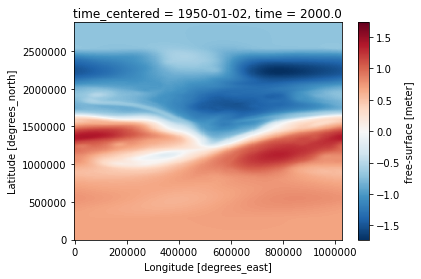

In [8]:
zeta = ds.zeta.isel(time=0)
zeta.plot()

<xarray.DataArray (eta_v: 721, xi_rho: 257)>
dask.array<truediv, shape=(721, 257), dtype=float32, chunksize=(720, 257), chunktype=numpy.ndarray>
Coordinates:
  * eta_v    (eta_v) float32 0.0 4000.0 8000.0 ... 2872000.0 2876000.0 2880000.0
  * xi_rho   (xi_rho) float32 -2000.0 2000.0 6000.0 ... 1018000.0 1022000.0


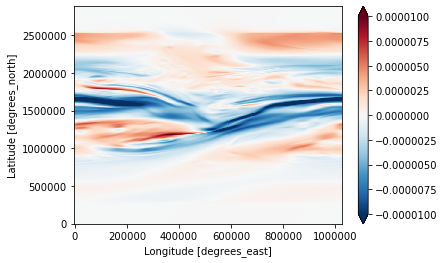

In [10]:
dzetady = grid.derivative(zeta, 'eta', boundary='fill')
print(dzetady)
dzetady.plot(vmax=1e-5)

In [13]:
grid.interp(zeta, 'eta', boundary='fill')

<xarray.DataArray 'mul-4fd52b4a11adf0d82076821eb81af87d' (eta_v: 721, xi_rho: 257)>
dask.array<mul, shape=(721, 257), dtype=float32, chunksize=(720, 257), chunktype=numpy.ndarray>
Coordinates:
  * eta_v    (eta_v) float32 0.0 4000.0 8000.0 ... 2872000.0 2876000.0 2880000.0
  * xi_rho   (xi_rho) float32 -2000.0 2000.0 6000.0 ... 1018000.0 1022000.0